## Markowitz’s Efficient Frontier in Python
#### https://medium.com/python-data/effient-frontier-in-python-34b0c3043314

## Efficient Frontier & Portfolio Optimization with Python

#### https://medium.com/python-data/efficient-frontier-portfolio-optimization-with-python-part-2-2-2fe23413ad94

In [115]:
# import needed modules
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [116]:
# Ações do Desafio

from pandas_datareader import data as wb
TickerA='LAME4.SA'
TickerB='WEGE3.SA'
TickerC='BRFS3.SA'
TickerD='^BVSP'    #mercado'
prices=pd.DataFrame()
tickers = [TickerA, TickerB, TickerC, TickerD]
for t in tickers:
    prices[t]=wb.DataReader(t, data_source='yahoo', start='2014-1-1')['Adj Close']
    
prices.sort_values(by = ['Date'],ascending=False).head()

,LAME4.SA,WEGE3.SA,BRFS3.SA,^BVSP
Date,,,,
2020-03-27,19.000000,35.360001,14.87,73428.78125
2020-03-26,20.850000,37.950001,15.97,77710.00000
2020-03-25,20.030001,37.360001,15.91,74956.00000
2020-03-24,19.290001,36.060001,15.04,69729.00000
2020-03-23,17.490000,35.200001,14.03,63570.00000


In [118]:
# calculate daily and annual returns of the stocks
returns_daily = prices.pct_change()
#returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

In [119]:
# set the number of combinations for imaginary portfolios
num_assets = len(tickers)
num_portfolios = 50000

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(tickers):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility'] + [stock+' weight' for stock in tickers]

# reorder dataframe columns
df = df[column_order]

df.head()

,Returns,Volatility,LAME4.SA weight,WEGE3.SA weight,BRFS3.SA weight,^BVSP weight
0,0.132113,0.264007,0.276325,0.267060,0.212387,0.244228
1,0.162384,0.249442,0.015399,0.334905,0.028552,0.621145
2,0.111458,0.278201,0.380847,0.070278,0.157824,0.391051
3,0.011866,0.305120,0.245811,0.116209,0.623781,0.014199
4,0.183250,0.265529,0.292226,0.324699,0.032142,0.350933


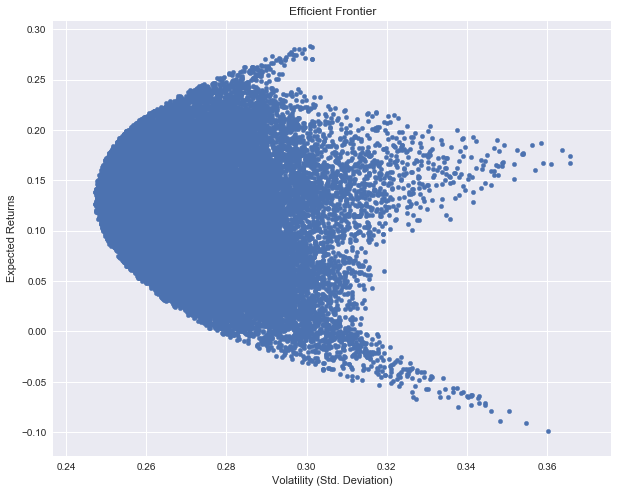

In [120]:
# plot the efficient frontier with a scatter plot
plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

### Efficient Frontier & Portfolio Optimization with Python


In [121]:
# Ações do Desafio

from pandas_datareader import data as wb
TickerA='LAME4.SA'
TickerB='WEGE3.SA'
TickerC='BRFS3.SA'
TickerD='^BVSP'    #mercado'
prices=pd.DataFrame()
tickers = [TickerA, TickerB, TickerC, TickerD]
for t in tickers:
    prices[t]=wb.DataReader(t, data_source='yahoo', start='2014-1-1')['Adj Close']
    
prices.sort_values(by = ['Date'],ascending=False).head()

,LAME4.SA,WEGE3.SA,BRFS3.SA,^BVSP
Date,,,,
2020-03-27,19.000000,35.360001,14.87,73428.78125
2020-03-26,20.850000,37.950001,15.97,77710.00000
2020-03-25,20.030001,37.360001,15.91,74956.00000
2020-03-24,19.290001,36.060001,15.04,69729.00000
2020-03-23,17.490000,35.200001,14.03,63570.00000


In [122]:
# calculate daily and annual returns of the stocks
returns_daily = prices.pct_change()
#returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

In [123]:
#set random seed for reproduction's sake
np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)


# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

print(len(portfolio['Volatility']))
print(len(portfolio['Returns']))
print(len(portfolio['Sharpe Ratio']))

50000
50000
50000


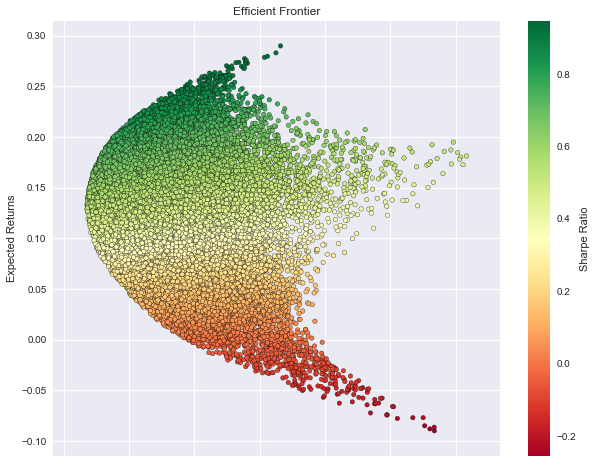

In [124]:
# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(tickers):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]


# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)


# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in tickers]

# reorder dataframe columns
df = df[column_order]


# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)

plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

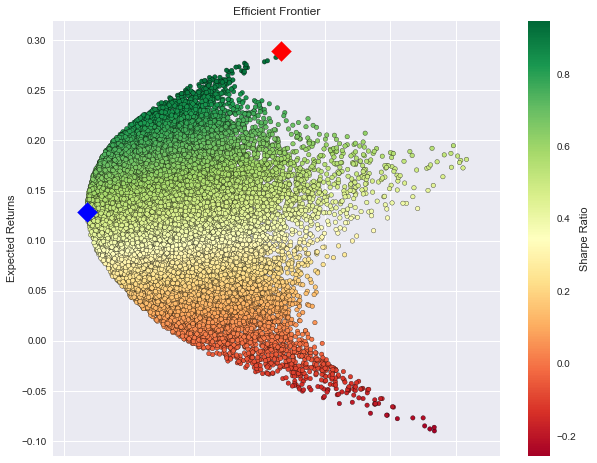

In [125]:

# find min Volatility & max sharpe values in the dataframe (df)

min_volatility = df['Volatility'].min()

max_sharpe = df['Sharpe Ratio'].max()


# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]


# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)

plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [126]:
# print the details of the 2 special portfolios

print(min_variance_port.T)
print('\n')
print(sharpe_portfolio.T)

                    22655
Returns          0.128634
Volatility       0.247117
Sharpe Ratio     0.520540
LAME4.SA Weight  0.001097
WEGE3.SA Weight  0.293179
BRFS3.SA Weight  0.142283
^BVSP Weight     0.563442


                    40599
Returns          0.289760
Volatility       0.306370
Sharpe Ratio     0.945785
LAME4.SA Weight  0.063618
WEGE3.SA Weight  0.916285
BRFS3.SA Weight  0.019167
^BVSP Weight     0.000930
